In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = [file for file in os.listdir('./oneminutesago21')]

septiembre = pd.DataFrame()
for file in files:
  df = pd.read_csv('./oneminutesago21/'+file)
  septiembre = pd.concat([septiembre, df])

In [3]:
septiembre.head()

,TOA5,8543,CR1000X,8543.1,CR1000X.Std.03.02,CPU:Est_meteo1.CR1X,5308,OneMinute
0,TIMESTAMP,RECORD,Irradiance_Avg,T_amb_Avg,RH_Avg,P_atm_Avg,NaN,NaN
1,TS,RN,W/m^2,Deg C,%,mbar,NaN,NaN
2,NaN,NaN,Avg,Avg,Avg,Avg,NaN,NaN
3,2021-08-10 00:00:00,877384,0,15.35,83.3,755.8435,NaN,NaN
4,2021-08-10 00:01:00,877385,0,15.37,83.3,755.8446,NaN,NaN


# Arreglando la tabla

In [4]:
septiembre.drop(septiembre.index[0:3], axis = 0, inplace = True)
septiembre.drop(['OneMinute', '5308'],axis='columns', inplace=True)

# Convirtiendolo a float

In [5]:
septiembre = septiembre.astype({'CR1000X': float, '8543.1':float, 'CR1000X.Std.03.02':float, 'CPU:Est_meteo1.CR1X':float,'8543':float})

# Sacando promedios

In [6]:
prom_rad = septiembre['CR1000X'].mean()
prom_Tamb = septiembre['8543.1'].mean()
prom_atm = septiembre['CPU:Est_meteo1.CR1X'].mean()
proms_septiembre = [prom_rad, prom_Tamb,prom_atm]
septiembre.describe()

,8543,CR1000X,8543.1,CR1000X.Std.03.02,CPU:Est_meteo1.CR1X
count,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000
mean,886743.500000,208.698005,15.956006,73.817580,753.789767
std,12886.602345,334.367469,2.741168,16.930722,2.182060
min,864424.000000,0.000000,10.930000,30.350000,541.484100
25%,875583.750000,0.000000,13.810000,61.200000,752.687750
50%,886743.500000,7.201500,15.240000,78.020000,753.910550
75%,897903.250000,293.825000,17.900000,87.600000,755.198650
max,909063.000000,1377.000000,24.110000,100.000000,757.624800


In [7]:
septiembre.to_csv('septiembre22.csv', index=False)
mes = 'septiembre'
anio = '2021'

# Radiacion septiembre

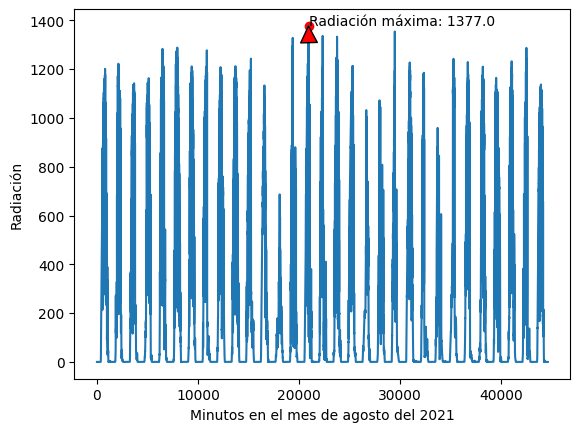

In [8]:
df = pd.read_csv("septiembre22.csv")

plt.plot(df.index, df['CR1000X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Radiación')
max_value = df['CR1000X'].max()
max_index = df['CR1000X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Radiación máxima: '+str(max_value), xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Temperatura Ambiente septiembre

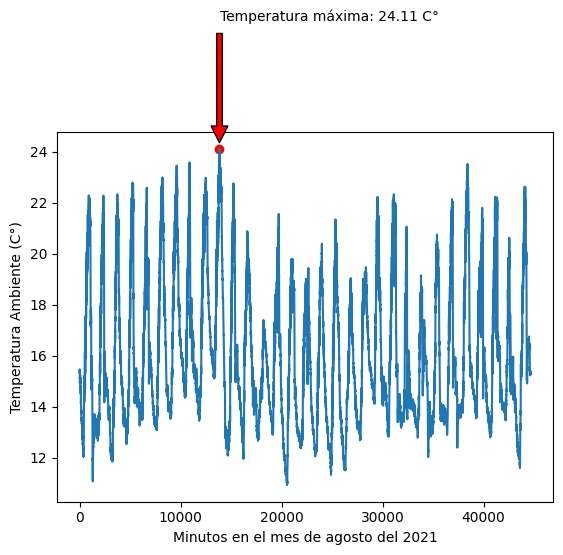

In [9]:

plt.plot(df.index, df['8543.1'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Temperatura Ambiente (C°)')
max_value = df['8543.1'].max()
max_index = df['8543.1'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Temperatura máxima: '+str(max_value)+ ' C°', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Presion septiembre

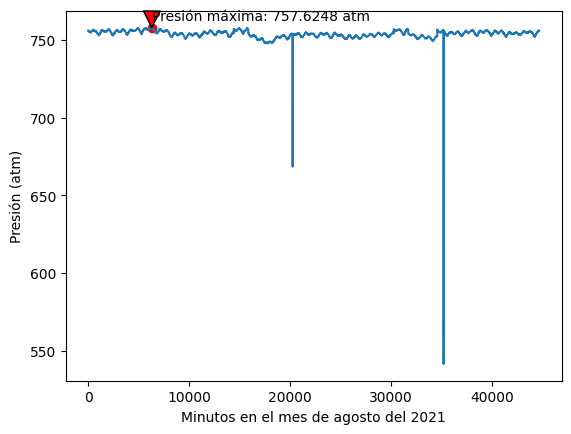

In [10]:

plt.plot(df.index, df['CPU:Est_meteo1.CR1X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Presión (atm)')
max_value = df['CPU:Est_meteo1.CR1X'].max()
max_index = df['CPU:Est_meteo1.CR1X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Temperatura máxima')
plt.annotate('Presión máxima: '+str(max_value) + ' atm', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()